In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Load the CSV file
data = pd.read_csv("iris.csv")

#Split to X, Y
X=data.iloc[:,0:2]
X=np.array(X)
Y=data.iloc[:,4]
Y=np.array(Y)


In [3]:
# Split the data into a 70-30 train-test ratio with random_state=0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) # each run will be seperate data

In [4]:
tree_clf=DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

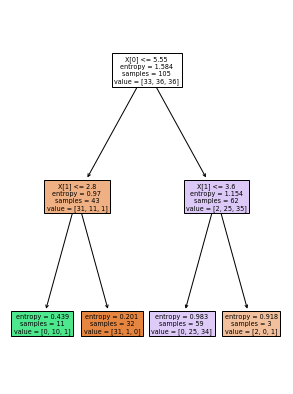

In [5]:
#print the tree
plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(tree_clf,filled=True,ax=ax);

In [6]:
y_hat_train = tree_clf.predict(X_train)

In [7]:
cm_train = confusion_matrix(Y_train, tree_clf.predict(X_train))
print(cm_train)

[[33  0  0]
 [ 1 10 25]
 [ 1  1 34]]


In [8]:
accuracy_train = cm_train.diagonal().sum()/cm_train.sum()
accuracy_train

0.7333333333333333

In [9]:
cm_test = confusion_matrix(Y_test, tree_clf.predict(X_test))
print(cm_test)

[[16  1  0]
 [ 0  0 14]
 [ 1  0 13]]


In [10]:
accuracy_test = cm_test.diagonal().sum()/cm_test.sum()
accuracy_test

0.6444444444444445

In [15]:
depth_max_values = [1, 2, 3, 4, 5]

for depth_max in depth_max_values:
    clf = DecisionTreeClassifier(max_depth=depth_max)
    scores = cross_val_score(clf, X_train, Y_train, cv=3)
    print("Depth max = {}, Mean Accuracy = {}".format(depth_max, np.mean(scores)))


Depth max = 1, Mean Accuracy = 0.5904761904761905
Depth max = 2, Mean Accuracy = 0.6857142857142856
Depth max = 3, Mean Accuracy = 0.6952380952380953
Depth max = 4, Mean Accuracy = 0.6952380952380951
Depth max = 5, Mean Accuracy = 0.7047619047619048


#### לפי התוצאות שקיבלנו, העומק 5 הוא הטוב ביותר בגלל שיש לו את הדיוק הטוב ביותר

In [16]:
min_samples_leaf_values = [1, 5, 10, 20, 50]

for min_samples_leaf in min_samples_leaf_values:
    clf.set_params(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(clf, X_train, Y_train , cv=3)
    mean_accuracy = np.mean(scores)
    print("Min samples leaf = {}, Mean Accuracy = {}".format(min_samples_leaf, mean_accuracy))

Min samples leaf = 1, Mean Accuracy = 0.7047619047619048
Min samples leaf = 5, Mean Accuracy = 0.6476190476190476
Min samples leaf = 10, Mean Accuracy = 0.6952380952380953
Min samples leaf = 20, Mean Accuracy = 0.6
Min samples leaf = 50, Mean Accuracy = 0.3428571428571428


#### לפי התוצאות שקיבלנו, עלה 1 הוא הטוב ביותר בגלל שיש לו את הדיוק הטוב ביותר

In [17]:
nodes_leaf_max_values = [2, 5, 10, 20, 50]

for nodes_leaf_max in nodes_leaf_max_values:
    clf = DecisionTreeClassifier(max_leaf_nodes=nodes_leaf_max)
    scores = cross_val_score(clf, X_train, Y_train, cv=3)
    print("Max leaf nodes = {}, Mean Accuracy = {}".format(nodes_leaf_max, np.mean(scores)))

Max leaf nodes = 2, Mean Accuracy = 0.5904761904761905
Max leaf nodes = 5, Mean Accuracy = 0.6857142857142856
Max leaf nodes = 10, Mean Accuracy = 0.7142857142857143
Max leaf nodes = 20, Mean Accuracy = 0.7619047619047619
Max leaf nodes = 50, Mean Accuracy = 0.7428571428571429


#### לפי התוצאות שקיבלנו, 20 הוא הטוב ביותר בגלל שיש לו את הדיוק הטוב ביותר